<a href="https://colab.research.google.com/github/vs1991/ga-learner-dsmp-repo/blob/master/Capstone_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading from drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('../Greyatom',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ../Greyatom


In [3]:
cd ../Greyatom/'My Drive'/'my first book'/'capstone project'

/Greyatom/My Drive/my first book/capstone project


In [4]:
ls

 Cusomer_Cleaned.csv            JTD_Cleaned.csv
 Customer_Data.csv              JTD.csv
'customer datas legend .xlsx'  'Mahindra problem description of the data.docx'
 Final_invoice.csv              Plant_Cleaned.csv
 Invoice_Cleaned.csv           'Plant Master_real.xlsx - Sheet1.csv'
 Invoice_Data.csv


In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly


import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Files

In [6]:
#cleaned invoice data
inv=pd.read_csv('Invoice_Cleaned.csv')
inv=inv.drop(columns=['Unnamed: 0'])
inv['Customer No.'] = inv['Customer No.'].str.lstrip('0')


inv.head()


,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Job Month,Job Year
0,Thane,Retail,67849,Maharashtra,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,477.014722,12,2014
1,THNAE,Retail,84419,Maharashtra,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,19.920556,1,2015
2,THANE[W],Retail,81055,Maharashtra,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,23.536944,1,2015
3,THNAE,Retail,84419,Maharashtra,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,1.470000,1,2015
4,THANE,Retail,18980,Maharashtra,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,25.359722,1,2015


In [7]:
#cleaned customer data
customer=pd.read_csv('Cusomer_Cleaned.csv')
customer=customer.drop(columns=['Unnamed: 0','Business Partner'])

customer['Customer No.'] = customer['Customer No.'].astype(str)
customer['Data Origin'].value_counts()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.



Reference - Customer                149997
Reference - Employee                121660
Camp - Outdoor                       63237
Camp - Workshop                      38326
Fleet                                36801
Spotted the outlet                   29780
Other outdoor activity               28828
Outdoor Sales Activity               15382
Hoardings/Outdoor Advertisements     13967
Just Dial/Other helpline             12122
Newspaper AD                          8118
Float activity                        8023
Company website                       6260
Newspaper leaflet                     5685
Emailers                              5082
Insurance Company                     4014
Petrol pump activity                  3840
Reference - Used car dealer           2069
Television AD                          745
Snapdeal/Other websites                735
Mahindra Sister concern Employee       590
Radio                                   77
Name: Data Origin, dtype: int64

In [8]:
#cleaned jtd data
jtd=pd.read_csv('JTD_Cleaned.csv')
jtd=jtd.drop(columns=['Unnamed: 0'])

jtd.head()

,DBM Order,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [9]:
plant=pd.read_csv('Plant_Cleaned.csv')
plant=plant.drop(columns=['Unnamed: 0'])

plant.head()

,Plant,Name 1,House number and street,PO Box,City,State
0,BC07,NERKUNDRAM,"No.117 Poonamallee High Road,",600107.0,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,"C-118, Phase 07,",160055.0,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,"Unit No.3, Kothari Compound,",400610.0,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,"18/1, C Site 4, Sahibabad",201010.0,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,"#75, Sy.No. 83/2, Panathur Mai",560087.0,Bengaluru,Karnataka


In [10]:
#jtd_grouped=jtd.groupby(['DBM Order','Item Category'],as_index=False).agg({"Net value":'sum',"Order Quantity":"sum"})
#inv_jtd=pd.merge(inv,jtd_grouped,how="left",left_on='Job Card No',right_on='DBM Order')

inv_cust=pd.merge(inv,customer,on='Customer No.',how='left')
inv_plant=pd.merge(inv,plant,on='Plant',how='left')
inv_cust_plant=pd.merge(inv_cust,plant,on='Plant',how='left')

#inv_jtd_customer=pd.merge(inv_jtd,customer,how='left',on='Customer No.')
#combined_data=pd.merge(inv_jtd_customer,plant,on='Plant',how='left')


In [11]:
inv_cust_plant.isnull().sum()/len(inv_cust_plant)

CITY                       0.000000
Cust Type                  0.000000
Customer No.               0.000000
District                   0.000000
Invoice No                 0.000000
Job Card No                0.000000
KMs Reading                0.000000
Labour Total               0.000000
Make                       0.000000
Misc Total                 0.000000
Model                      0.000000
OSL Total                  0.000000
Order Type                 0.000000
Parts Total                0.000000
Pin code                   0.000000
Plant                      0.000000
Plant Name1                0.000000
Print Status               0.000000
Recovrbl Exp               0.000000
Regn No                    0.000000
Total Amt Wtd Tax.         0.000000
User ID                    0.000000
Invoice_DateTime           0.000000
JobCard_DateTime           0.000000
Service_Time               0.000000
Job Month                  0.000000
Job Year                   0.000000
Partner Type               0

In [12]:
inv_cust_plant=inv_cust_plant.drop(columns=['Name 1','House number and street','PO Box'])

In [13]:
inv_cust_plant.shape

(492314, 31)

# **EDA** 

# Revenue Analysis

1.   Year Wise revenue Analysis
2.   Order Wise revenue Analysis
3.   Make wise revenue Analysis
4.   State wise revenus Analyise



In [14]:
year_income=inv_cust_plant.groupby(['Job Year','Job Month'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(year_income, x="Job Month", y="Total Amt Wtd Tax.", color='Job Year')
fig.show()

In [15]:
order_income=inv_cust_plant.groupby(['Job Year','Order Type'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(order_income, x="Job Year", y="Total Amt Wtd Tax.", color='Order Type')

fig.update_layout(title='Year Wise Order Revenue')

fig.show()

In [16]:
make_income=inv_cust_plant.groupby(['Job Year','Make'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(make_income, x="Job Year", y="Total Amt Wtd Tax.", color='Make')

fig.update_layout(title='Year Wise Make/Car Revenue')

fig.show()

In [17]:
state_income=inv_cust_plant.groupby(['Job Year','State'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(state_income, x="Job Year", y="Total Amt Wtd Tax.", color='State')

fig.update_layout(title='State wise Revenue')

fig.show()
#model_income.sort_values(by='Total Amt Wtd Tax.',ascending=False)

# Source Income 

In [159]:
#source affecting to more income 
source_income=inv_cust_plant.groupby(['Job Year','Data Origin'],as_index=False)['Total Amt Wtd Tax.'].sum()


fig = px.line(source_income, x="Job Year", y="Total Amt Wtd Tax.", color='Data Origin')

fig.update_layout(title='Source wise income ')

fig.show()
#model_income.sort_values(by='Total Amt Wtd Tax.',ascending=False)

# Labour Revenue Analysis?


In [18]:

# Mean labour charges according to each order 
labour_charge=inv_cust_plant[['Labour Total','Order Type']]
lab=pd.DataFrame(labour_charge.groupby(['Order Type'])['Labour Total'].mean()).rename(columns={'Labour total':'Mean Labour Cost'}).reset_index()
lab.head()

,Order Type,Labour Total
0,Accidental,4885.251306
1,Mechanical,1085.795634
2,Paid Service,1506.658535
3,Repeat Order,0.295761
4,Running Repairs,797.417464


In [19]:
fig = px.bar(lab, y='Labour Total', x='Order Type')
fig.update_layout(template='ggplot2', title="Mean Labour charges for various order type")

fig.show()


In [20]:
labor_year_income=inv_cust_plant.groupby(['Job Year','Job Month'],as_index=False)['Labour Total'].sum()


fig = px.line(labor_year_income, x="Job Year", y="Labour Total", color='Job Month')
fig.update_layout(template='ggplot2', title="labor Charges For various months ")
fig.show()

In [21]:
month_income=inv_cust_plant.groupby(['Job Month'],as_index=False)['Labour Total'].sum()


fig = px.line(month_income, x="Job Month", y="Labour Total")
fig.update_layout(template='ggplot2', title="Overall Labor costing during various months ")
fig.show()


In [22]:
order_year_income=inv_cust_plant.groupby(['Order Type','Job Year'],as_index=False)['Labour Total'].sum()


fig = px.line(order_year_income, x="Job Year", y="Labour Total", color='Order Type')
fig.update_layout(template='ggplot2', title="labor Charges For various order in all years ")
fig.show()

## Total number of plants in each state

In [23]:
#total number of plants in each states
state=pd.crosstab(columns=plant['State'],index='Plant')
state.head()

State,Andhara Pradesh,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,West Bengal
row_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Plant,1,15,7,21,1,5,1,1,15,22,5,2,12,33,6,35,58,1,1,13,3,18,52,50,16,50,9,14


In [24]:
city=pd.crosstab(columns=plant['City'],index='Plant')
city.head()

City,Abohar,Agra,Ahmednagar,Akbarpur,Akola,Aligarh,Allahabad,Alwar,Ambala,Ambattur - Chennai,Ambikapur,Ambur,Amritsar,Amroha,Anand,Anandpur Sahib,Anantapur,Anantnag,Andheri,Angul,Araria,Attur,Aurangabad,Avadi,Bahr,Bahraich,Balaghat,Balanagar,Balasore,Ballia,Barielly,Baripada,Barmer,Batala,Bazpur,Begusarai,Behala,Behror,Belgaum,Bellandur - Bangalore,...,Talcher,Tandur,Thane,Thane(W),Thanjavur,Thirupathi,Thiruvallur,Thiruvarur,Tikamgarh,Tinsukia,Tiptur,Tiruchirappalli,Tirunelveli,Tirupur,Titagarh,Trichy,Trivandrum,Tumkur,Tuticorin,Udaipur,Udgir,Udumalpet,Udupi,Ujjain,Una,Vadali Bhoi,Vadodara,Vapi,Varanasi,Vijayapura,Vijayawada,Villupuram,Visnagar,Vyara,Wai,Warangal,Wardha,Yavatmal,Yeshwantpur - Banglore,Zirakpur
row_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Plant,1,3,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,...,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,2,1,1,1,1,1,1,1,1,1


## Number of plants in each city

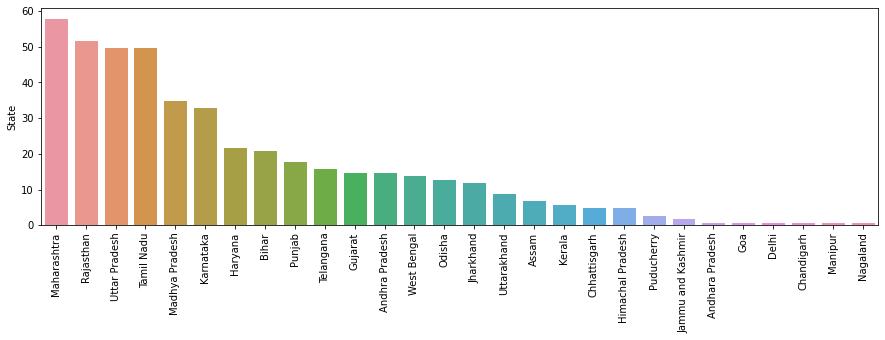

In [25]:
#graphical representation of number of plants in each state
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.set(style='darkgrid')
ax=sns.barplot(plant['State'].value_counts().index,plant['State'].value_counts())

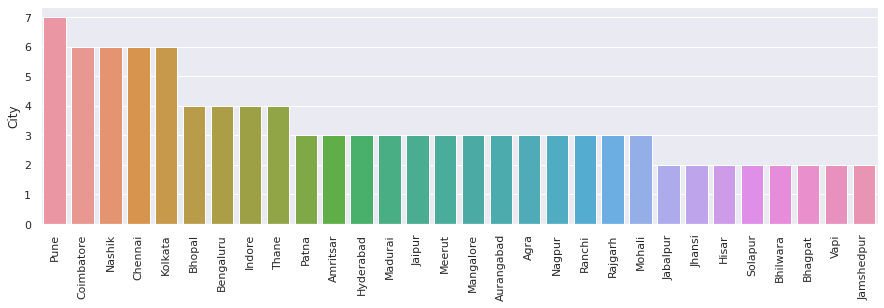

In [26]:
#graphical representation of number of plants in each city
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.set(style='darkgrid')
ax=sns.barplot(plant['City'].value_counts().head(30).index,plant['City'].value_counts().head(30))

## Number of plants according to various zones

In [27]:
#divide states into zones 
northern_zone       =['Chandigarh','Delhi','Haryana','Himachal Pradesh','Jammu and Kashmir','Ladakh'
                     ,'Punjab','Rajasthan','Uttarakhand','Uttar Pradesh']

north_eastern_Zone  =[  ]

eastern_zone        =['Bihar', 'Jharkhand', 'Odisha','West Bengal','Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland']

central_western_zone=['Madhya Pradesh', 'Chhattisgarh', 'Goa', 'Gujarat', 'Maharashtra']

southern_zone       =[ 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu','Telangana']


In [28]:
f1=plant['State'].isin(northern_zone)
f2=plant['State'].isin(eastern_zone)
f3=plant['State'].isin(central_western_zone)
f4=plant['State'].isin(southern_zone)
#filt5=plant['State'].isin(north_eastern_Zone)

n_state    =plant.loc[f1]
e_state     =plant.loc[f2]
c_w_state=plant.loc[f3]
s_state    =plant.loc[f4]
#north_east_state=plant.loc[filt5]


In [29]:
trace1=go.Bar(
                y = n_state['State'].value_counts().values,
                x = n_state['State'].value_counts().index,
                name = "Northern Zone",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =s_state['State'].value_counts().values,
                x = s_state['State'].value_counts().index,
                name = "Southern Zone",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =e_state['State'].value_counts().values  ,
                x = e_state['State'].value_counts().index,
                name = "Eastern Zone",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =c_w_state['State'].value_counts().values  ,
                x = c_w_state['State'].value_counts().index,
                name = "Central and Western Zone",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))




fig = go.Figure(data = [trace1,trace2,trace3,trace4])

fig.update_layout(template='ggplot2', title="Plant Count in various state")


In [30]:

#fig, axs=plt.subplots(nrows=2,ncols=2,figsize=(16.5,10))

#sns.barplot(north_state['State'].value_counts().values,north_state['State'].value_counts().index,ax=axs[0,0])
#axs[0,0].set_title('Northern Zone')

#sns.barplot(east_state['State'].value_counts().values,east_state['State'].value_counts().index,ax=axs[0,1])
#axs[0,1].set_title('Eastern Zone')

#sns.barplot(cent_west_state['State'].value_counts().values,cent_west_state['State'].value_counts().index,ax=axs[1,0])
#axs[1,0].set_title('Cental & Western Zone')

#sns.barplot(south_state['State'].value_counts().values,south_state['State'].value_counts().index,ax=axs[1,1])
#axs[1,1].set_title('Southern Zone')

#sns.barplot(north_east_state['State'].value_counts().values,north_east_state['State'].value_counts().index,ax=axs[2,0])
#axs[2,0].set_title('North Eastern Zone')


# Location Based Analysis

In [31]:
#k=inv_plant[inv_plant['State']=='Maharashtra']

#for i in ['CITY','City','State','District','Regn No']:
 # print(k[i].value_counts())
  #print('*'*80)

In [32]:
inv_plant.shape

(492314, 32)

In [33]:

 
#city=[]
#state=[]
#car_count=[]
 
#for i in loc1['City'].unique():
 #  city.append(i)
  # car_count.append(len(loc1[loc1['City']==i]['Regn No'].value_counts()))
   #state.append(loc1[loc1['City']==i]['State'].value_counts().index)
    #print('*'*60)


#k=loc[loc['State']=='Kerala']
#len(k[k['City']=='Kottayam']['Regn No'].value_counts())

In [34]:
#plant_most_cars=pd.DataFrame({'City':city,'State':state,'Total Unique Cars':car_count})

In [35]:
#plant_most_cars.sort_values(by=['Total Unique Cars'],inplace=True,ascending=False)
#plant_most_cars

In [36]:
#sns.barplot(plant_most_cars['Total Unique Cars'].head(10),plant_most_cars['City'].head(10))

In [37]:

 
filt1=inv_plant['State'].isin(northern_zone)
north_state=inv_plant.loc[filt1]


filt2=inv_plant['State'].isin(eastern_zone)
east_state=inv_plant.loc[filt2]


filt3=inv_plant['State'].isin(central_western_zone)
cent_west_state=inv_plant.loc[filt3]

filt4=inv_plant['State'].isin(southern_zone)
south_state=inv_plant.loc[filt4]


# **Which** **make** **and** **model** **is** **more** popular?

1.   Make popular in various zones
2.   Model popular in various zone 
3.   Make with most sales





In [38]:
#graphical representation of famous makes among various zones 

from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=2)
#for northern zone 
fig.add_trace(go.Bar(
                y = north_state['Make'].value_counts().head(5).values,
                x = north_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              1, 1)
fig.add_trace(go.Bar(
                y = north_state['Model'].value_counts().head(5).values,
                x = north_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              1, 2)
fig.update_xaxes(title_text="Make count('northern Zone )", row=1, col=1)
fig.update_xaxes(title_text="Model count('northern Zone )", row=1, col=2)

#figure for eastern zone 
fig.add_trace(go.Bar(
                y = east_state['Make'].value_counts().head(5).values,
                x = east_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              2, 1)
fig.add_trace(go.Bar(
                y = east_state['Model'].value_counts().head(5).values,
                x = east_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              2, 2)
fig.update_xaxes(title_text="Make count('Eastern Zone )", row=2, col=1)
fig.update_xaxes(title_text="Model count('Eastern Zone )", row=2, col=2)

#figure for southern zone 
fig.add_trace(go.Bar(
                y = south_state['Make'].value_counts().head(5).values,
                x = south_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              3, 1)
fig.add_trace(go.Bar(
                y = south_state['Model'].value_counts().head(5).values,
                x = south_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              3, 2)
fig.update_xaxes(title_text="Make count('Southern Zone )", row=3, col=1)
fig.update_xaxes(title_text="Model count('Southern Zone )", row=3, col=2)

#figure for centeral and western zone 
fig.add_trace(go.Bar(
                y = cent_west_state['Make'].value_counts().head(5).values,
                x = cent_west_state['Make'].value_counts().head(5).index,
                marker=dict(color=[1, 2, 3,4,5])),
              4, 1)
fig.add_trace(go.Bar(
                y = cent_west_state['Model'].value_counts().head(5).values,
                x = cent_west_state['Model'].value_counts().head(5).index,
                marker=dict(color=[15,8,9,10,11])),
              4, 2)
fig.update_xaxes(title_text="Central & Western Zone )", row=4, col=1)
fig.update_xaxes(title_text="Central & Western Zone )", row=4, col=2)

fig.update_layout(template='ggplot2', title="Zonal Count",height=1100, width=1100)


fig.show()

In [39]:
#sns.scatterplot(inv_plant[inv_plant["Make"]=="PORCHE"]["Total Amt Wtd Tax."],inv_cust_plant['Total Amt Wtd Tax.'])



# which area has most cars?


1.   Zone wise 
2.   Top 5 States






In [40]:
#according to zones
data=[['Northern Zone',north_state['Make'].count()],['Eastern Zone',east_state['Make'].count()],
      ['Central & Western Zone',cent_west_state['Make'].count()],['Southern Zone',south_state['Make'].count()]]
overall=pd.DataFrame(data,columns=['Zones','Count'])
overall.head()

,Zones,Count
0,Northern Zone,100139
1,Eastern Zone,7292
2,Central & Western Zone,173905
3,Southern Zone,202347


In [41]:
import plotly.graph_objects as go
#graphical representation of most cars in various zones
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=overall['Zones'],
                             values=overall['Count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(template='ygridoff', title="Zone Wise Car Count")

fig.show()


In [42]:

#overall car count in each state
car1=[]
state1=[]
for i in inv_plant['State'].unique():
  car1.append(inv_plant[inv_plant['State']==i]['Make'].count())
  state1.append(i)

df1=pd.DataFrame({'States':state1,'car count':car1})
df1=df1.sort_values(by='car count',ascending=False)
df1

,States,car count
0,Maharashtra,133716
2,Tamil Nadu,114350
4,Karnataka,44306
6,Uttar Pradesh,35971
1,Telangana,30513
3,Gujarat,25901
8,Punjab,23989
7,Haryana,20171
11,Madhya Pradesh,13690
16,Rajasthan,13346


In [43]:
#state wise count

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df1['States'][0:10],
                             values=df1['car count'][0:10])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(template='ggplot2', title=" Top 10 State wise count car count")
fig.show()

# which service structure is popular in different zones ?



1.   Northern Zone 
2.   Eastern Zone 
3.   Central and western Zone
4.   Southern Zone 







## **Northern** Zone

In [44]:
one=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Uttar Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()

two=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Haryana'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Punjab'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Uttarakhand'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()


five=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Himachal Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
five=five.rename(columns={'Order Type':'count'})
five=five.reset_index()




six=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Rajasthan'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
six=six.rename(columns={'Order Type':'count'})
six=six.reset_index()


seven=pd.DataFrame(north_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Chandigarh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
seven=seven.rename(columns={'Order Type':'count'})
seven=seven.reset_index()


In [45]:
trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Uttar Pradesh",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "Haryana",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Punjab",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Uttarakhand",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(
                y =five['count']  ,
                x = five['Order Type'],
                name = "Himachal Pradesh",
                marker = dict(color = 'DarkSlateGrey',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace6 = go.Bar(
                y =six['count']  ,
                x = six['Order Type'],
                name = "Rajasthan",
                marker = dict(color = 'goldenrod',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace7 = go.Bar(
                y =seven['count']  ,
                x = seven['Order Type'],
                name = "Chandigarh",
                marker = dict(color = 'darksalmon',
                         line=dict(color='rgb(0,0,0)',width=1.5)))



fig = go.Figure(data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7])
fig.update_layout(template='plotly_dark', title="Famous order typ in Northern Zone")

iplot(fig)

## Central and Western Zone 

In [46]:
one=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Maharashtra'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()



two=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Gujarat'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Madhya Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(cent_west_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Chhattisgarh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()

,Order Type,count
0,Paid Service,380
1,Running Repairs,147
2,Accidental,71


In [47]:
trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Maharashtra",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "Gujarat",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Rajasthan",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Chhattisgarh",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))


fig = go.Figure(data = [trace1,trace2,trace3,trace4])
fig.update_layout(template='plotly_dark', title="Famous order in Central & Western Zone")

iplot(fig)

## eastern and north eastern zone 

In [48]:
one=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Bihar'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()

two=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['West Bengal'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Odisha'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Jharkhand'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()


five=pd.DataFrame(east_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Assam'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
five=five.rename(columns={'Order Type':'count'})
five=five.reset_index()


In [49]:


trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Bihar",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "West Bengal",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Odisha",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Jharkhand",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(
                y =five['count']  ,
                x = five['Order Type'],
                name = "Assam",
                marker = dict(color = 'DarkSlateGrey',
                         line=dict(color='rgb(0,0,0)',width=1.5)))



fig = go.Figure(data = [trace1,trace2,trace3,trace4,trace5])
fig.update_layout(template='plotly_dark', title="Famous order in North Eastern Zone")

iplot(fig)

## Southern Zone 

In [50]:
one=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Telangana'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
one=one.rename(columns={'Order Type':'count'})
one=one.reset_index()
one.head()

two=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Tamil Nadu'])
#one=pd.DataFrame(loc1groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
two=two.rename(columns={'Order Type':'count'})
two=two.reset_index()
two.head()

three=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Karnataka'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
three=three.rename(columns={'Order Type':'count'})
three=three.reset_index()
three.head()


four=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Puducherry'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
four=four.rename(columns={'Order Type':'count'})
four=four.reset_index()
four.head()


five=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Andhra Pradesh'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
five=five.rename(columns={'Order Type':'count'})
five=five.reset_index()


six=pd.DataFrame(south_state.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False).loc['Kerala'])
#one=pd.DataFrame(loc1.groupby(['State'])['Order Type'].value_counts().sort_values(ascending=False))
six=six.rename(columns={'Order Type':'count'})
six=six.reset_index()



In [51]:



trace1=go.Bar(
                y = one['count'],
                x = one['Order Type'],
                name = "Telangana",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'],
                x = two['Order Type'],
                name = "Tamil Nadu",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count']  ,
                x = three['Order Type'],
                name = "Karnataka",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


trace4 = go.Bar(
                y =four['count']  ,
                x = four['Order Type'],
                name = "Puducherry",
                marker = dict(color = 'rgba(255, 225,1, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(
                y =five['count']  ,
                x = five['Order Type'],
                name = "Andhra Pradesh",
                marker = dict(color = 'DarkSlateGrey',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace6 = go.Bar(
                y =six['count']  ,
                x = six['Order Type'],
                name = "Kerala",
                marker = dict(color = 'goldenrod',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

#trace7 = go.Bar(
 #               y =seven['count']  ,
  #              x = seven['Order Type'],
   #             name = "Chandigarh",
    #            marker = dict(color = 'darksalmon',
     #                    line=dict(color='rgb(0,0,0)',width=1.5)))



fig = go.Figure(data = [trace1,trace2,trace3,trace4,trace5,trace6])
fig.update_layout(template='plotly_dark', title="Famous order in Southern Zone")

iplot(fig)

# Service Structure for particular car ?

In [52]:
one=pd.DataFrame(inv_plant.groupby(['Order Type'])['Make'].value_counts().sort_values(ascending=False)).loc['Running Repairs']
one=one.rename(columns={'Make':'count'})
one=one.reset_index()
one

two=pd.DataFrame(inv_plant.groupby(['Order Type'])['Make'].value_counts().sort_values(ascending=False)).loc['Accidental']
two=two.rename(columns={'Make':'count'})
two=two.reset_index()
two

three=pd.DataFrame(inv_plant.groupby(['Order Type'])['Make'].value_counts().sort_values(ascending=False)).loc['Mechanical']
three=three.rename(columns={'Make':'count'})
three=three.reset_index()
three

,Make,count
0,MARUTI SUZUKI,4416
1,MAHINDRA & MAHINDRA,2842
2,HYUNDAI,2423
3,TATA MOTORS,1786
4,GENERAL MOTORS,870
5,FORD,669
6,TOYOTA,658
7,HONDA,393
8,SKODA,228
9,VOLKSWAGEN,227


In [53]:



trace1=go.Bar(
                y = one['count'][0:5],
                x = one['Make'][0:5],
                name = "Running repairs",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                y =two['count'][0:5],
                x = two['Make'][0:5],
                name = "Accidental",
                marker = dict(color = 'rgba(155, 255, 128, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 

trace3 = go.Bar(
                y =three['count'][0:5]  ,
                x = three['Make'][0:5],
                name = "Mechanical",
                marker = dict(color = 'rgba(355, 355,1000, 0.5)',
                         line=dict(color='rgb(0,0,0)',width=1.5))) 


fig = go.Figure(data = [trace1,trace2,trace3])
fig.update_layout(template='ggplot2', title="Famous order among cars")

iplot(fig)

# Seasonal Orders

1.   Year Wise Analysis
2.   Overall Ananlysis



## Year Wise

In [54]:
for_2012=inv_cust_plant[inv_cust_plant['Job Year']==2012]
for_2013=inv_cust_plant[inv_cust_plant['Job Year']==2013]
for_2014=inv_cust_plant[inv_cust_plant['Job Year']==2014]
for_2015=inv_cust_plant[inv_cust_plant['Job Year']==2015]
for_2016=inv_cust_plant[inv_cust_plant['Job Year']==2016]


In [55]:
inv_cust_plant['Job Year'].value_counts().sort_index().index

Int64Index([2012, 2013, 2014, 2015, 2016], dtype='int64')

In [56]:
for i in inv_cust_plant['Job Year'].value_counts().sort_index().index:
  year=inv_cust_plant[inv_cust_plant['Job Year']==i]
  rain=[6,7,8,9]
  filt=year['Job Month'].isin(rain)
  rain_data=year.loc[filt]
###creating dataframes of season wise analysis of order type
###for rain season:
  rain_df=pd.DataFrame(rain_data['Order Type'].value_counts())
  rain_df=rain_df.rename(columns={'Order Type':'count'})
  rain_df=rain_df.reset_index()
  rain_df=rain_df.rename(columns={'index':'order type'})
  rain_df.head()
###summer
  summer=[2,3,4,5]
  filt2=year['Job Month'].isin(summer)
  summer_data=year.loc[filt2]
###winter
  winter=[10,11,12,1]
  filt1=year['Job Month'].isin(winter)
  winter_data=year.loc[filt1]
  winter_data.head()
###for winter season
  winter_df=pd.DataFrame(winter_data['Order Type'].value_counts())
  winter_df=winter_df.rename(columns={'Order Type':'count'})
  winter_df=winter_df.reset_index()
  winter_df=winter_df.rename(columns={'index':'order type'})
  winter_df.head()
###for summer season
  summer_df=pd.DataFrame(summer_data['Order Type'].value_counts())
  summer_df=summer_df.rename(columns={'Order Type':'count'})
  summer_df=summer_df.reset_index()
  summer_df=summer_df.rename(columns={'index':'order type'})
  summer_df.head()

  colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

  #fig = go.Figure(data=[go.Pie(labels=rain_df['order type'],title='Rainy Season Orders',
                             #values=rain_df['count'])])
  #fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  #marker=dict(colors=colors, line=dict(color='#000000', width=2)))
  #fig.show()

  fig = make_subplots(rows=1, cols=3)
#for northern zone 


  fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=['WINTER', 'RAIN','SUMMER'])
  fig.add_trace(go.Pie(labels=winter_df['order type'], values=winter_df['count']),
              1, 1)
  fig.add_trace(go.Pie(labels=rain_df['order type'], values=rain_df['count']),
              1, 2)
  fig.add_trace(go.Pie(labels=summer_df['order type'], values=summer_df['count']),
              1, 3)
  print('for the {}'.format(i))
  fig.update_layout(template='ggplot2', title='For the year {}'.format(i))
  fig.show()



for the 2012


for the 2013


for the 2014


for the 2015


for the 2016


## Overall Analysis

In [57]:


######Rainy season:
rain=[6,7,8,9]
filt=inv_plant['Job Month'].isin(rain)
rain_data=inv_plant.loc[filt]
###creating dataframes of season wise analysis of order type
###for rain season:
rain_df=pd.DataFrame(inv_plant['Order Type'].value_counts())
rain_df=rain_df.rename(columns={'Order Type':'count'})
rain_df=rain_df.reset_index()
rain_df=rain_df.rename(columns={'index':'order type'})
rain_df.head()
###summer
summer=[2,3,4,5]
filt2=inv_plant['Job Month'].isin(summer)
summer_data=inv_plant.loc[filt2]
###winter
winter=[10,11,12,1]
filt1=inv_plant['Job Month'].isin(winter)
winter_data=inv_plant.loc[filt1]
winter_data.head()
###for winter season
winter_df=pd.DataFrame(winter_data['Order Type'].value_counts())
winter_df=winter_df.rename(columns={'Order Type':'count'})
winter_df=winter_df.reset_index()
winter_df=winter_df.rename(columns={'index':'order type'})
winter_df.head()
###for summer season
summer_df=pd.DataFrame(summer_data['Order Type'].value_counts())
summer_df=summer_df.rename(columns={'Order Type':'count'})
summer_df=summer_df.reset_index()
summer_df=summer_df.rename(columns={'index':'order type'})
summer_df.head()

,order type,count
0,Running Repairs,77362
1,Paid Service,40085
2,Mechanical,15058
3,Accidental,14433
4,SMC Redemption,5472


In [58]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=['WINTER', 'RAIN','SUMMER'])
fig.add_trace(go.Pie(labels=winter_df['order type'], values=winter_df['count']),
              1, 1)
fig.add_trace(go.Pie(labels=rain_df['order type'], values=rain_df['count']),
              1, 2)
fig.add_trace(go.Pie(labels=summer_df['order type'], values=summer_df['count']),
              1, 3)
print('for the {}'.format(i))
fig.update_layout(template='ggplot2', title="Overall Orders ")
fig.show()

for the 2016


# Inventory Management

In [59]:
#combination of customer,invoice,plant and item 
inv_cust_plant_jtd=pd.merge(inv_cust_plant,jtd,left_on='Job Card No',right_on='DBM Order')

In [60]:
inv_cust_plant

,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Job Month,Job Year,Partner Type,Data Origin,City,State
0,Thane,Retail,67849,Maharashtra,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,477.014722,12,2014,Retail,Reference - Used car dealer,Thane,Maharashtra
1,THNAE,Retail,84419,Maharashtra,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,19.920556,1,2015,Retail,Camp - Outdoor,Thane,Maharashtra
2,THANE[W],Retail,81055,Maharashtra,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,23.536944,1,2015,Retail,Reference - Customer,Thane,Maharashtra
3,THNAE,Retail,84419,Maharashtra,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,1.470000,1,2015,Retail,Camp - Outdoor,Thane,Maharashtra
4,THANE,Retail,18980,Maharashtra,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,25.359722,1,2015,Retail,Reference - Customer,Thane,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,Chennai,Retail,203820,Tamil Nadu,7231000017,400100,72546,2495.90,MARUTI SUZUKI,374.97,ALTO,0.00,Paid Service,1587.28,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN38Y9343,4458.15,X405SA1,2016-06-30 14:56:58,2016-06-30 09:15:12,5.696111,6,2016,Retail,Newspaper AD,Chennai,Tamil Nadu
492310,ADAMBAKKAM,Retail,170411,Tamil Nadu,7231000018,400092,18968,2443.47,NISSAN,0.00,MICRA,0.00,Paid Service,4388.61,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN22CK0396,6832.08,X405SA1,2016-06-30 15:06:52,2016-06-30 08:42:15,6.410278,6,2016,Retail,Reference - Employee,Chennai,Tamil Nadu
492311,CHENNAI,Retail,48811,Tamil Nadu,7231000019,400082,177433,2598.92,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,6588.79,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN07BA0211,9187.71,X405SA1,2016-06-30 15:43:56,2016-06-30 08:27:51,7.268056,6,2016,Retail,Spotted the outlet,Chennai,Tamil Nadu
492312,"Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,7231000020,400545,22932,11000.00,HONDA,100.00,AMAZE,0.00,Accidental,0.00,600042,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN07BV9290,11100.00,X405SA1,2016-06-30 15:58:59,2016-06-30 12:53:48,3.086389,6,2016,Retail,Spotted the outlet,Chennai,Tamil Nadu


In [61]:
#inventory management
#P002 is for parts 

inventory=inv_cust_plant_jtd[['Make','Model','Order Type','Item Category','Description','Material','Order Quantity','Net value','Target quantity UoM','Parts Total']]
z=inventory[inventory['Item Category']=='P002']


In [62]:
parts=z.groupby(['Material','Description'],as_index=False)['Net value'].sum().sort_values(by='Net value',ascending=False)#,'Net values':'sum'})
parts['Net value']=parts['Net value'].apply(lambda x: '{:.2f}'.format(x))


In [63]:
trace1 = go.Bar(
                y =parts['Net value'][0:10],
                x = parts['Description'][0:10]
                )
fig = go.Figure(data = [trace1])

fig.update_layout(template='ggplot2', title="Top 10 most sold parts according to revenue")


In [64]:
#services code P010

services=inventory[inventory['Item Category']=='P010']
s=services.groupby(['Material','Description'],as_index=False)['Net value'].sum().sort_values(by='Net value',ascending=False)#,'Net values':'sum'})
s['Net value']=s['Net value'].apply(lambda x: '{:.2f}'.format(x))



In [65]:
trace1 = go.Bar(
                y =s['Net value'][0:10],
                x =s['Description'][0:10]
                )
fig = go.Figure(data = [trace1])

fig.update_layout(template='ggplot2', title="Top 10 Service provided according to revenue")


In [66]:
make=z.groupby(['Model','Make','Description'],as_index=False)['Net value'].sum()

In [67]:
ma=[]
description=[]
famous_parts=[]

for i in make['Make'].unique():
  o=make[make['Make']==i].sort_values(by='Net value',ascending=False)
  ma.append(i)
  description.append(o['Description'].iloc[0])
  famous_parts.append(o['Net value'].iloc[0])


df1=pd.DataFrame({'Make':ma,'description':description,'value':famous_parts})

In [68]:
df1

,Make,description,value
0,TATA MOTORS,URANIA SUPREMO CI 4 15W 40,5028760.65
1,BMW,HEAD LIGHT LH,63577.98
2,FIAT,SYNTIUM 3000 SM 5W 40,654095.17
3,MARUTI SUZUKI,URANIA SUPREMO CI 4 15W 40,5780317.64
4,AUDI,HEAD LAMP RH,130435.56
5,HYUNDAI,URANIA SUPREMO CI 4 15W 40,5802332.87
6,HONDA,URANIA SUPREMO CI 4 15W 40,1779317.81
7,HINDUSTAN MOTORS,URANIA SUPREMO CI 4 15W 40,16135.74
8,MAHINDRA & MAHINDRA,URANIA SUPREMO CI 4 15W 40,9753997.58
9,MORRIS,BATTERY CABLE TERMINAL,112.16


In [69]:
ser=services.groupby(['Model','Make','Description'],as_index=False)['Net value'].sum()

In [70]:
ma1=[]
description1=[]
famous_parts1=[]

for i in ser['Make'].unique():
  o=ser[ser['Make']==i].sort_values(by='Net value',ascending=False)
  ma1.append(i)
  description1.append(o['Description'].iloc[0])
  famous_parts1.append(o['Net value'].iloc[0])


df2=pd.DataFrame({'Make':ma1,'description':description1,'value':famous_parts1})
df2

,Make,description,value
0,TATA MOTORS,PAINTING CHARGES,3082607.76
1,BMW,PAINTING CHARGES,30099.48
2,MARUTI SUZUKI,PAINTING CHARGES,7312573.47
3,AUDI,PAINTING CHARGES,60400.24
4,HYUNDAI,PAINTING CHARGES,4392137.22
5,HONDA,PAINTING CHARGES,3757199.21
6,FIAT,PAINTING CHARGES,855427.75
7,HINDUSTAN MOTORS,FLUSHING RADIATOR,45000.00
8,MAHINDRA & MAHINDRA,PAINTING CHARGES,3585247.77
9,GENERAL MOTORS,PAINTING CHARGES,1065344.46


# Customer Segmentation

In [166]:
inv_cust_plant['Invoice_DateTime'] = pd.to_datetime(inv_cust_plant['Invoice_DateTime'])
inv_cust_plant['Invoice_Date']=inv_cust_plant['Invoice_DateTime'].dt.date
inv_cust_plant['Invoice_Date'].max()

datetime.date(2016, 10, 31)

In [167]:
clust=inv_cust_plant[['Customer No.','Invoice_Date','Total Amt Wtd Tax.']]


tx_user = pd.DataFrame(clust['Customer No.'].unique())
tx_user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = clust.groupby('Customer No.').Invoice_Date.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')



In [168]:
tx_frequency = clust.groupby('Customer No.').Invoice_Date.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

In [169]:
tx_user.head()

,CustomerID,Recency,Frequency
0,67849,668,5
1,84419,322,6
2,81055,319,3
3,18980,323,8
4,84457,254,3


In [170]:

tx_revenue = clust.groupby('Customer No.')['Total Amt Wtd Tax.'].sum().reset_index()
tx_frequency.columns = ['CustomerID','Revenue']
#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')
tx_user

,CustomerID,Recency,Frequency,Revenue
0,67849,668,5,5
1,84419,322,6,6
2,81055,319,3,3
3,18980,323,8,8
4,84457,254,3,3
...,...,...,...,...
253479,203817,123,1,1
253480,203808,123,1,1
253481,203844,123,1,1
253482,203820,123,1,1


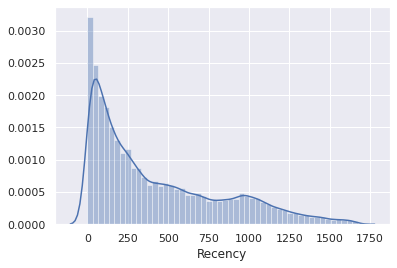

In [171]:

sns.distplot(tx_user['Recency'])

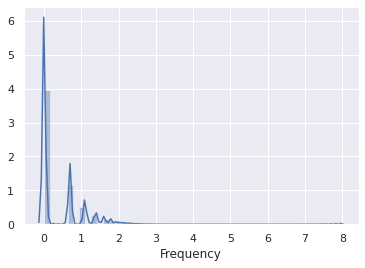

In [172]:


sns.distplot(np.log(tx_user['Frequency']))


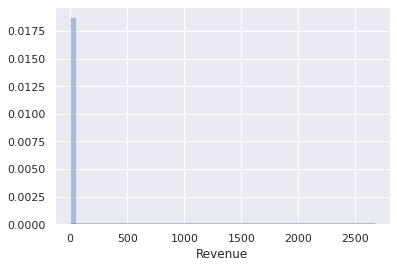

In [173]:
#tx_user['Revenue']=np.log(tx_user['Revenue'])

sns.distplot(tx_user['Revenue'])


In [174]:
from scipy import stats
customers_fix = pd.DataFrame()
#customers_fix["Recency"] = stats.boxcox(tx_user['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(tx_user['Frequency'])[0]
customers_fix["Revenue"] = pd.Series(np.cbrt(tx_user['Revenue'])).values
customers_fix["Recency"] = pd.Series(np.cbrt(tx_user['Recency'])).values
customers_fix.tail()

,Frequency,Revenue,Recency
253479,0.0,1.0,4.97319
253480,0.0,1.0,4.97319
253481,0.0,1.0,4.97319
253482,0.0,1.0,4.97319
253483,0.0,1.0,4.97319


In [175]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0. -0.  0.]
[1. 1. 1.]


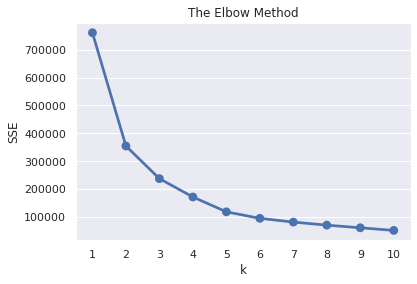

In [176]:
from sklearn.cluster import KMeans



sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [177]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(253484,)

In [178]:
tx_user["Cluster"] = model.labels_
tx_user.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Revenue':['mean', 'count']}).round(2)

Recency Frequency Revenue       
           mean      mean    mean  count
Cluster                                 
0        404.33      3.51    3.51  95147
1        122.25      1.00    1.00  83018
2        794.57      1.00    1.00  75319